## Indentification of all the members of the group.
Name: André Ferrari Moukarzel - 9298166

Name: Ângelo Gregório Lovatto - 9293435

## Name of the dataset
Dataset: Drug consumption

## Motivation to choose this dataset
Rational for choosing this dataset: Having the personality measurements of a large number of people (knowing other characteristics, like gender, age, etc..) opens up interesting possiblities for analysis, even more with the combined data of drug consumption.
 Not only that, the dataset consists of real-valued attributes which makes it easier to plot histograms and analyze features such as mean, standard deviation and the like. However, it's not clear if these analyses have any meaning in the context of the attributes considered.

## Abstract
The dataset consists of the results of a survey of 1885 participants with correspondent personal characteristics (age, ethnicity, level of education..) relating personality data to drug consumption.  18 legal and illegal and a fictional drug were considered, with the possible answers indicating how heavy of a consumer the respondent is.

## Questions to the dataset
Question 1: Is there a difference in distribution of any personality trait between sexes?

Question 2: Is a personality profile indicative that someone is an over-claimer (someone who affirmed using a fictional drug)? 

Question 3: Which are the most common drugs per country surveyed?


## EDA
Present your EDA strategy: 

Analyse the distribution of personality traits with gender separation.

Distinguish over-claimers from others and compare it with personality traits.

Binarize drug use into user and non-user from each drug, for easier analysis.

In [216]:
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import numpy as np

drugs = pd.read_csv('drug_consumption.data')
drugs.describe()

,id,age,gender,education,country,etnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## Question 1

Male, in blue:    -0.48246

Female, in orange: 0.48246

By plotting the distribution of the traits while distinguishing by gender, we can notice some interesting differences in some of the traits.

### Neuroticism

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.074399,1.008479,-3.46436,-0.79151,-0.05188,0.62967,2.61139
0.48246,942.0,0.074571,0.982509,-2.75696,-0.58016,0.04257,0.73545,3.27393


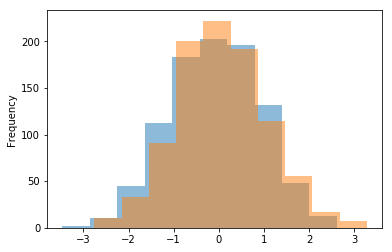

In [217]:
drugs.groupby('gender')['nscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['nscore'].describe()

### Extraversion

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.057834,1.037565,-3.27393,-0.80615,-0.15487,0.63779,3.27393
0.48246,942.0,0.057569,0.952663,-2.72827,-0.57545,0.00332,0.63779,3.00537


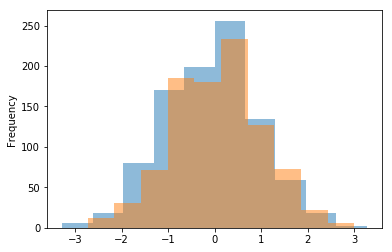

In [218]:
drugs.groupby('gender')['escore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['escore'].describe()

### Openess

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.129889,0.953495,-2.85950,-0.45174,0.14143,0.72330,2.90161
0.48246,942.0,-0.131096,1.021187,-3.27393,-0.84732,-0.17779,0.58331,2.90161


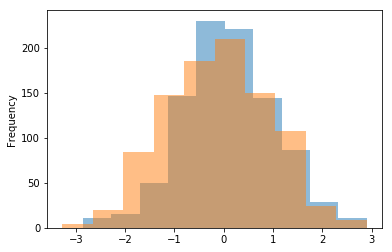

In [219]:
drugs.groupby('gender')['oscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['oscore'].describe()

### Agreeableness

It is of note that the median of the distribution is half a standard deviation higher among the females. That is a relevant difference in psychology, and is also the biggest difference among the "Big Five" NEO-FFI-R personality traits measurements.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.219251,0.970008,-3.46436,-0.91699,-0.30172,0.43852,3.46436
0.48246,942.0,0.218994,0.976623,-2.78793,-0.45321,0.28783,0.94156,3.15735


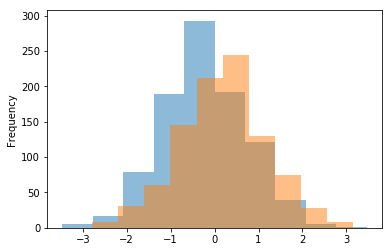

In [220]:
drugs.groupby('gender')['ascore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['ascore'].describe()

### Conscientiousness 

While the median is similar, it is noticeable that the male distribution tends to be 0.3 standard deviations lower than the female's. That is a relevant difference, given that low conscientiousness has been correlated to drug abuse in other studies.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.183616,0.975850,-3.46436,-0.78155,-0.27607,0.415940,3.00537
0.48246,942.0,0.183038,0.985697,-3.15735,-0.52745,0.25953,0.894192,3.46436


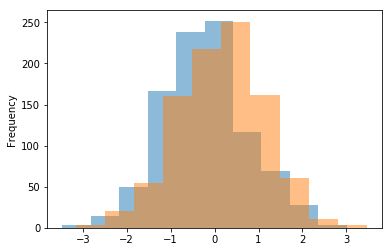

In [221]:
drugs.groupby('gender')['cscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['cscore'].describe()

### Impulsiveness

A trait that is considered a contributor to conscientiousness in NEO-FFI-R scaling, and is inversely correlated to such. Here, the difference between males and females is accentuated, with males being 0.4 standard deviations more impulsive, on average.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.166949,0.908093,-2.55524,-0.21712,0.19268,0.88113,2.90161
0.48246,942.0,-0.152686,0.973218,-2.55524,-0.71126,-0.21712,0.52975,2.90161


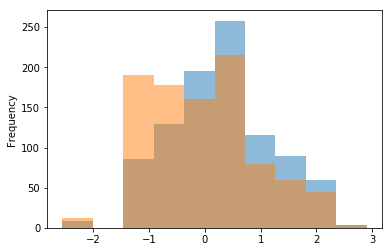

In [222]:
drugs.groupby('gender')['impulsive'].plot.hist(alpha=0.5)
drugs.groupby('gender')['impulsive'].describe()

### Sensation Seeking

This is the trait with the most noticeable difference between males and females, with females being, on average, half a standard deviation less sensation seeking and having a mean lower by a whole standard deviation.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.231931,0.881860,-2.07848,-0.21575,0.40148,0.76540,1.92173
0.48246,942.0,-0.238764,0.984864,-2.07848,-0.84637,-0.21575,0.40148,1.92173


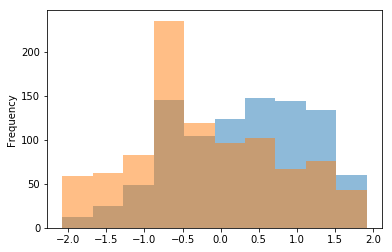

In [223]:
drugs.groupby('gender')['ss'].plot.hist(alpha=0.5)
drugs.groupby('gender')['ss'].describe()

## Question 2

False    1877
True        8
Name: overclaimer, dtype: int64

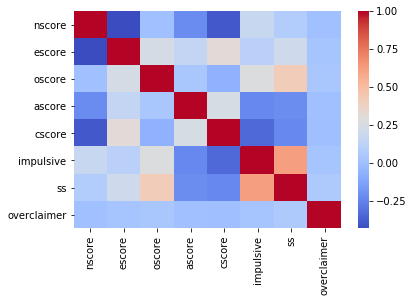

In [224]:
drugs['overclaimer'] = drugs['semer'] != 'CL0'
sns.heatmap(drugs[['nscore','escore','oscore','ascore','cscore', 'impulsive', 'ss','overclaimer']].corr(), cmap='coolwarm')
drugs['overclaimer'].value_counts()

Not only do all personality traits have no aparent correlation to what we called over-claimers (that is, people that told researchers they had ever used "Semer", a fictional drug), the number of over-claimers itself is so small that it would be impossible to gather statisticaly relevant data from it.

## Question 3

Keep in mind that New Zealand had only 5 participants, and Australia only 20.

USA: -0.57009

New Zealand: -0.46841

Other: -0.28519

Australia: -0.09765

Republic of Ireland: 0.21128

Canada: 0.24923

UK: 0.96082

In [225]:
drugs['alcohool'] = (drugs['alcohool'] != 'CL0') & (drugs['alcohool'] != 'CL1')
drugs['amphet'] = (drugs['amphet'] != 'CL0') & (drugs['amphet'] != 'CL1')
drugs['amyl'] = (drugs['amyl'] != 'CL0') & (drugs['amyl'] != 'CL1')
drugs['benzos'] = (drugs['benzos'] != 'CL0') & (drugs['benzos'] != 'CL1')
drugs['caff'] = (drugs['caff'] != 'CL0') & (drugs['caff'] != 'CL1')
drugs['cannabis'] = (drugs['cannabis'] != 'CL0') & (drugs['cannabis'] != 'CL1')
drugs['choc'] = (drugs['choc'] != 'CL0') & (drugs['choc'] != 'CL1')
drugs['coke'] = (drugs['coke'] != 'CL0') & (drugs['coke'] != 'CL1')
drugs['crack'] = (drugs['crack'] != 'CL0') & (drugs['crack'] != 'CL1')
drugs['ecstasy'] = (drugs['ecstasy'] != 'CL0') & (drugs['ecstasy'] != 'CL1')
drugs['heroin'] = (drugs['heroin'] != 'CL0') & (drugs['heroin'] != 'CL1')
drugs['ketamine'] = (drugs['ketamine'] != 'CL0') & (drugs['ketamine'] != 'CL1')
drugs['legalh'] = (drugs['legalh'] != 'CL0') & (drugs['legalh'] != 'CL1')
drugs['lsd'] = (drugs['lsd'] != 'CL0') & (drugs['lsd'] != 'CL1')
drugs['meth'] = (drugs['meth'] != 'CL0') & (drugs['meth'] != 'CL1')
drugs['mushrooms'] = (drugs['mushrooms'] != 'CL0') & (drugs['mushrooms'] != 'CL1')
drugs['nicotine'] = (drugs['nicotine'] != 'CL0') & (drugs['nicotine'] != 'CL1')
drugs['vsa'] = (drugs['vsa'] != 'CL0') & (drugs['vsa'] != 'CL1')

In [226]:
def lowest_to_highest(count_list):
    print("From lowest to highest, percentage of participants that claim to have used the drug:\n\n")
    names = ['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK']
    vals = [557, 5, 118, 54, 20, 87, 1044]
      
    for i, key in enumerate(count_list.keys()):
        if key[1]: # Number of "True"
            if key[0] == 'USA': # USA
                vals[0] = count_list[i]/vals[0]
            elif key[0] == 'NZ': # NZ
                vals[1] = count_list[i]/vals[1]
            elif key[0] == 'Other': # Other
                vals[2] = count_list[i]/vals[2]
            elif key[0] == 'AUS': # AUS
                vals[3] = count_list[i]/vals[3]
            elif key[0] == 'IE': # IE
                vals[4] = count_list[i]/vals[4]
            elif key[0] == 'CAN': # CAN
                vals[5] = count_list[i]/vals[5]
            else:
                vals[6] = count_list[i]/vals[6]
    
    vals, names = zip(*sorted(zip(vals, names)))
    for i in range(len(vals)):
        print(names[i], ": ",vals[i])

### Alcohol

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  0.020372478854912165
Other :  0.9745762711864406
USA :  0.9766606822262118
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87


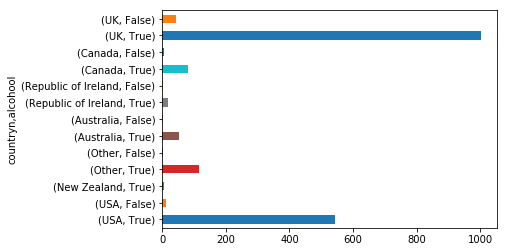

In [227]:
drugs['countryn'] = pd.cut(drugs['country'], [-0.58,-0.47,-0.3,-0.2,0.0,0.23,0.5,1.], labels=['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK'])
val = drugs.groupby('countryn')['alcohool'].value_counts()
val.plot(kind='barh')
lowest_to_highest(val)

### Amphetamines 

In [228]:
val = drugs.groupby('country')['amphet'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  13.771913474272822
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Amyl Nitrite

In [229]:
val = drugs.groupby('country')['amyl'].value_counts(sort=False)
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  6.34212382445141
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Benzodiazepine

In [230]:
val = drugs.groupby('country')['benzos'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  12.32799736856532
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Caffeine

In [231]:
val = drugs.groupby('country')['caff'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
Republic of Ireland :  20
Australia :  54
UK :  54.82705274992087
Canada :  87
Other :  118
USA :  557


### Cannabis

In [232]:
val = drugs.groupby('country')['cannabis'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
Republic of Ireland :  20
UK :  24.65056841058606
Australia :  54
Canada :  87
Other :  118
USA :  557


### Chocolate

In [233]:
val = drugs.groupby('country')['choc'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
Republic of Ireland :  20
Australia :  54
UK :  56.466864467495256
Canada :  87
Other :  118
USA :  557


### Cocaine

In [234]:
val = drugs.groupby('country')['coke'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  16.021125
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Crack

In [235]:
val = drugs.groupby('country')['crack'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
UK :  98.69747899159664
Other :  118
USA :  557


### Ecstasy

In [236]:
val = drugs.groupby('country')['ecstasy'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  13.562605779314497
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Heroin

In [237]:
val = drugs.groupby('country')['heroin'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  0.7214506172839507
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Ketamines

In [238]:
val = drugs.groupby('country')['ketamine'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  2.0555555555555554
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Legal Highs

In [239]:
val = drugs.groupby('country')['legalh'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  10.971794871794872
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### LSD

In [240]:
val = drugs.groupby('country')['lsd'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  2.7020498967106312
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Methadone

In [241]:
val = drugs.groupby('country')['meth'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  3.259365687526607
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Mushrooms

In [242]:
val = drugs.groupby('country')['mushrooms'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
UK :  6.585179632406018
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


### Nicotine

In [243]:
val = drugs.groupby('country')['nicotine'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


New Zealand :  5
Republic of Ireland :  20
Australia :  54
UK :  58.50793650793651
Canada :  87
Other :  118
USA :  557


### Volatile Substance Abuse

In [244]:
val = drugs.groupby('country')['vsa'].value_counts()
lowest_to_highest(val)

From lowest to highest, percentage of participants that claim to have used the drug:


UK :  2.7709359605911335
New Zealand :  5
Republic of Ireland :  20
Australia :  54
Canada :  87
Other :  118
USA :  557


## Considerations

### About the Dataset

 The dataset is rich, and having its data all converted to float values certanly makes it a great candidate for experiments with machine learning, even though it makes it harder for human analysis. 
 
 The data on drug is easy enough to manage, and is very surprising in many aspects.
 
 The data on personality traits is surprisingly technical and deep, so its hard for a non-psychologist to evaluate the meaning of the results completly. Our analysis presented us with mostly the expected results given past research made in this area - that is, men and women have roughly the same distribution of personality traits, with the exception of Agreeableness, where women are more agreeable - but surprisingly there was also a difference in Conscientiousness that is not reported in studies, and also noticeable difference in impulsiveness and sensation seeking, which also seems abnormal.
 
 Does that mean there was some bias in the participants? We may never know.
 
 
### Importance of EDA

 Having an EDA was surprisingly helpful in going about understanding and analysing the data. We were able to answer our questions about the dataset faster than expected, and are confident we'd be able to make a more complex analysis and explore other interesting questions in the future.
 